# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import os
stylepath = os.path.join('darkthemefivethirtyeight.mplstyle')
plt.style.use(stylepath)

In [2]:
browser = Browser('firefox')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
htmlstring = browser.html
soup = BeautifulSoup(htmlstring, 'html.parser')

In [5]:
# Extract all rows of data
rowData = soup.findAll('tr', class_= "data-row")

rowDataText = [r.text for r in rowData]
print(rowDataText[0])


2
2012-08-16
10
155
6
-75.0
739.0



### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
rowList = []

# Loop through the scraped data to create a list of rows
rowList = [[value.strip() for value in r.split('\n')] for r in rowDataText]
print(rowList[0])

['', '2', '2012-08-16', '10', '155', '6', '-75.0', '739.0', '']


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
rowDF = pd.DataFrame(rowList)
rowDF.drop(columns=[0,8], inplace=True)
rowDF.rename(columns={1:'id',2:'terrestrial_date',3:'sol',4:'ls',5:'month',6:'min_temp',7:'pressure'}, inplace=True)

In [8]:
# Confirm DataFrame was created successfully
rowDF

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
rowDF.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
rowDF = rowDF.astype({'id':object,'terrestrial_date':'datetime64[ns]', 'sol':'int32','ls':'int32','month':'int32','min_temp':float,'pressure':float})


In [11]:
# Confirm type changes were successful by examining data types again
rowDF.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
print(rowDF['month'].max())

12


In [13]:
# 2. How many sols (Martian days) worth of data are there?
print(rowDF['sol'].max())

1977


In [14]:
# 3. What is the average minimum temperature by month?
avgTempMonth = rowDF.groupby('month')['min_temp'].mean()
avgTempMonth 

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

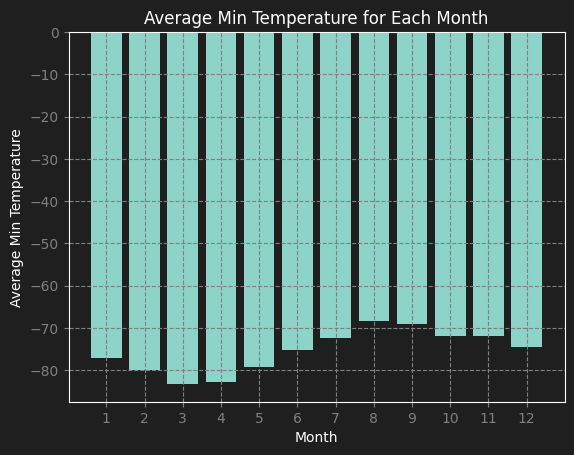

In [15]:
# Plot the average minimum temperature by month
plt.bar(avgTempMonth.index, avgTempMonth.values)
plt.xlabel('Month')
plt.ylabel('Average Min Temperature')
plt.title('Average Min Temperature for Each Month')
plt.xticks(range(1,13))
plt.grid(True, linestyle='--')
plt.show()

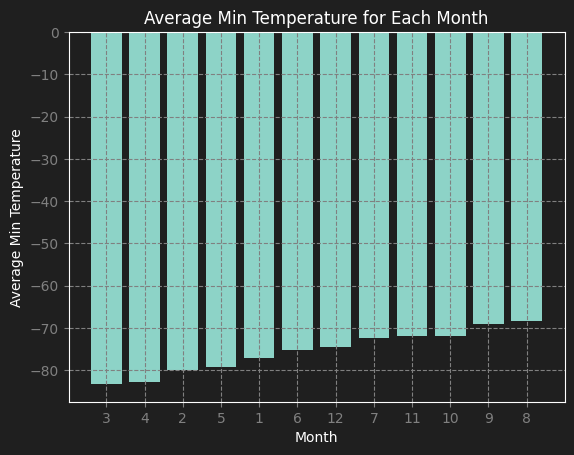

In [44]:
import numpy as np
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avgTempMonth = rowDF.groupby(['month'])['min_temp'].mean().reset_index()
# Sort_value() is being a mess, so had to do this mess instead...
idx = avgTempMonth['min_temp'].argsort()
avgTempMonth = avgTempMonth.iloc[idx]
# The index is being a pain... having to really overcomplicate this code...
tick_positions = np.arange(len(avgTempMonth))
tick_labels = [x + 1 for x in avgTempMonth.index]
# Cross your fingers! Hopefully this works
plt.bar( range(len(avgTempMonth)),avgTempMonth['min_temp'])
plt.xlabel('Month')
plt.ylabel('Average Min Temperature')
plt.title('Average Min Temperature for Each Month')
plt.xticks(tick_positions, tick_labels)
plt.grid(True, linestyle='--')
plt.show()


In [45]:
# 4. What is the average pressure by month?
avgPressureMonth = rowDF.groupby('month')['pressure'].mean()
avgPressureMonth

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

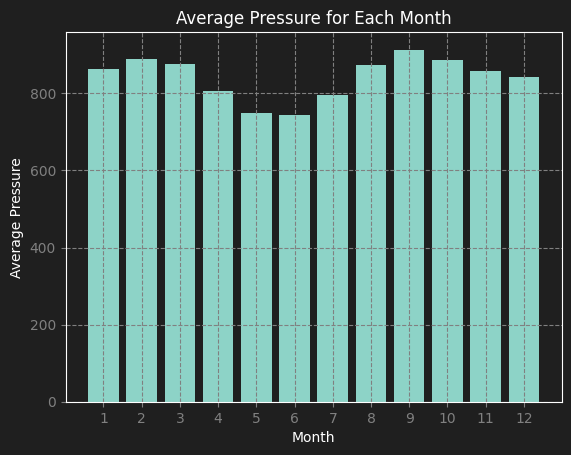

In [46]:
# Plot the average pressure by month
plt.bar(avgPressureMonth.index, avgPressureMonth.values)
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure for Each Month')
plt.xticks(range(1,13))
plt.grid(True, linestyle='--')
plt.show()

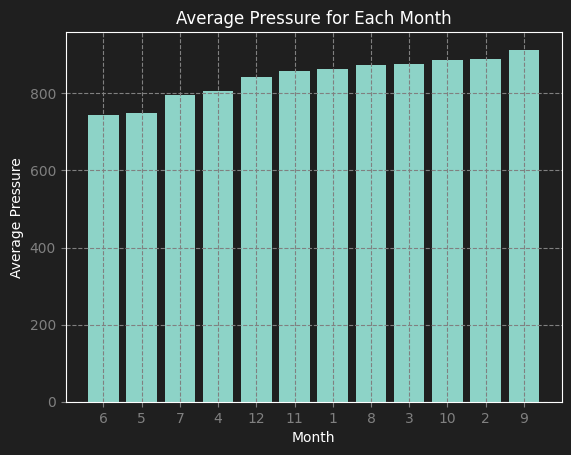

In [47]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avgPressureMonth = rowDF.groupby(['month'])['pressure'].mean().reset_index()
# Sort_value() is being a mess, so had to do this mess instead...
idx = avgPressureMonth['pressure'].argsort()
avgPressureMonth = avgPressureMonth.iloc[idx]
# The index is being a pain... having to really overcomplicate this code...
tick_positions = np.arange(len(avgPressureMonth))
tick_labels = [x + 1 for x in avgPressureMonth.index]
# Cross your fingers! Hopefully this works
plt.bar( range(len(avgPressureMonth)),avgPressureMonth['pressure'])
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure for Each Month')
plt.xticks(tick_positions, tick_labels)
plt.grid(True, linestyle='--')
plt.show()


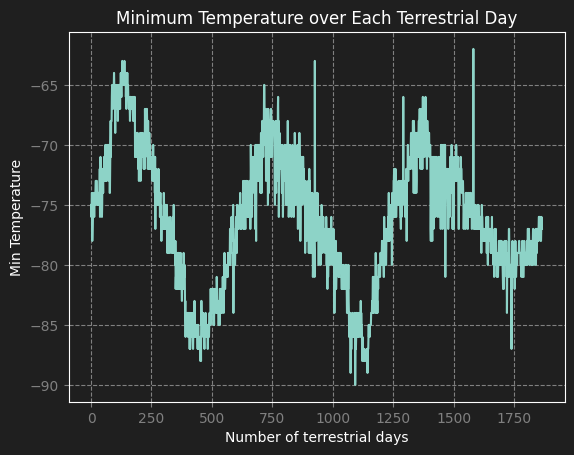

In [66]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
minTempPerDay = rowDF.groupby(['terrestrial_date'])['min_temp'].mean()
days = minTempPerDay.index
plt.plot(range(len(minTempPerDay)),minTempPerDay.values)
plt.xlabel('Number of terrestrial days')
plt.ylabel('Min Temperature')
plt.title('Minimum Temperature over Each Terrestrial Day')
plt.grid(True, linestyle='--')
plt.show()

#### Minimum Temperature

The coldest earth month is March for this time period of data, however since it appears there are multiple summers and winters over a terrestrial 12-month period, Mars' timescale is likely different to our own.

#### Atmospheric Pressure

It seems Mars' ambient pressure increases during the winter, this is likey because gases are more concentrated/ heavier due to the cold temperatures.

#### Year Length
It seems that Mars' years is just around 550 terrestrial days, you can observe this by looking at the peak of winter, to peak of summer, to the next peak of winter; then you take a look at the days between the two.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [67]:
# Write the data to a CSV
rowDF.to_csv('output.csv')

In [68]:
browser.quit()